<img src="../Pierian-Data-Logo.PNG">
<br>
<strong><center>Copyright 2019. Created by Jose Marcial Portilla.</center></strong>

# CNN Exercises
For these exercises we'll work with the <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a> dataset, also available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load the Fashion-MNIST dataset
Run the cell below to load the libraries needed for this exercise and the Fashion-MNIST dataset.<br>
PyTorch makes the Fashion-MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

In [1]:
import torch
import time
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

## 1. Create data loaders
Use DataLoader to create a <tt>train_loader</tt> and a <tt>test_loader</tt>. Batch sizes should be 10 for both.

In [2]:
# CODE HERE
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [3]:
# DON'T WRITE HERE

## 2. Examine a batch of images
Use DataLoader, <tt>make_grid</tt> and matplotlib to display the first batch of 10 images.<br>
OPTIONAL: display the labels as well

Label: [6 9 7 4 2 0 7 5 1 3]
Class: ['Shirt', 'Boot', 'Sneaker', 'Coat', 'Sweater', 'T-shirt', 'Sneaker', 'Sandal', 'Trouser', 'Dress']


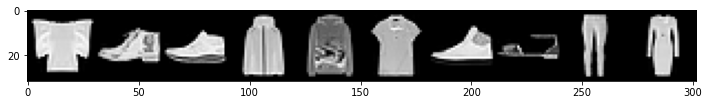

In [4]:
# CODE HERE
for image,labels in train_loader:
    break
print(f"Label: {labels.numpy()}")
print(f"Class: {[class_names[i] for i in labels]}")
grid_images = make_grid(image,nrow=10)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(grid_images,(1,2,0)))

In [5]:
# DON'T WRITE HERE
# IMAGES ONLY

In [6]:
# DON'T WRITE HERE
# IMAGES AND LABELS

## Downsampling
<h3>3. If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?</h3>

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [7]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


### 4. If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [8]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


## CNN definition
### 5. Define a convolutional neural network
Define a CNN model that can be trained on the Fashion-MNIST dataset. The model should contain two convolutional layers, two pooling layers, and two fully connected layers. You can use any number of neurons per layer so long as the model takes in a 28x28 image and returns an output of 10. Portions of the definition have been filled in for convenience.

In [9]:
# CODE HERE
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,5,1)
        self.conv2 = nn.Conv2d(6,12,3,1)
        self.fc1 = nn.Linear(5*5*12,84)
        self.fc2 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2)
        X = X.view(-1,5*5*12)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X,dim=1)
    
torch.manual_seed(101)
model = ConvolutionalNetwork()

## Trainable parameters

### 6. What is the total number of trainable parameters (weights & biases) in the model above?
Answers will vary depending on your model definition.

In [10]:
print(f"The total number of parameters is {sum([param.numel() for param in model.parameters()])}")

The total number of parameters is 26950


### 7. Define loss function & optimizer
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used Cross Entropy Loss and Adam (learning rate of 0.001) respectively.

In [11]:
# CODE HERE
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0005)

In [12]:
# DON'T WRITE HERE

### 8. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 5 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [13]:
# CODE HERE
start_time = time.time()
epochs = 20

train_loss = []
train_correct = []
test_loss = []
test_correct = []

for epoch in range(epochs):
    epoch +=1
    #Train 
    number_correct = 0
    for b,train_batch in enumerate(train_loader):
        
        ## Generate predictions
        y_pred = model(train_batch[0])
        predicted = torch.max(y_pred,1)[1]
        
        ## Compare to current values and compute loss correct
        loss = criterion(y_pred,train_batch[1])
        number_correct += torch.sum(train_batch[1] == predicted).numpy()
        
        ## Backpropagation and update optimizers
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    epoch_correct = number_correct/len(train_loader.dataset)*100
    epoch_loss = loss.detach().numpy()
    train_correct.append(epoch_correct)
    train_loss.append(epoch_loss)
    print(f"**************** EPOCH: {epoch} ****************")
    print(f"loss: {epoch_loss:.2f}, accuracy: {epoch_correct:.2f} %")    
    
    #Validate
    number_correct = 0
    with torch.no_grad():
        for b,test_batch in enumerate(test_loader):
            ## Generate predictions
            y_pred = model(test_batch[0])
            predicted = torch.max(y_pred,1)[1]
            
            ## Generate val_loss and val_accuracy
            loss = criterion(y_pred,test_batch[1])
            number_correct += torch.sum(test_batch[1] == predicted).numpy()
            
            epoch_correct = number_correct/len(test_loader.dataset)*100
            epoch_loss = loss.detach().numpy()
            test_correct.append(epoch_correct)
            test_loss.append(epoch_loss)
    print(f"val_loss: {epoch_loss:.2f}, val_accuracy: {epoch_correct:.2f} %, time: {(time.time()-start_time):2f} seconds")

            
        





**************** EPOCH: 1 ****************
loss: 1.07, accuracy: 77.57 %
val_loss: 0.27, val_accuracy: 82.01 %, time: 20.629004 seconds
**************** EPOCH: 2 ****************
loss: 0.43, accuracy: 84.39 %
val_loss: 0.09, val_accuracy: 85.39 %, time: 40.777680 seconds
**************** EPOCH: 3 ****************
loss: 0.25, accuracy: 86.48 %
val_loss: 0.24, val_accuracy: 83.85 %, time: 60.894174 seconds
**************** EPOCH: 4 ****************
loss: 0.08, accuracy: 87.57 %
val_loss: 0.06, val_accuracy: 86.61 %, time: 81.259133 seconds
**************** EPOCH: 5 ****************
loss: 0.09, accuracy: 88.23 %
val_loss: 0.09, val_accuracy: 86.96 %, time: 101.479095 seconds
**************** EPOCH: 6 ****************
loss: 0.14, accuracy: 88.95 %
val_loss: 0.04, val_accuracy: 87.76 %, time: 121.593958 seconds
**************** EPOCH: 7 ****************
loss: 0.10, accuracy: 89.41 %
val_loss: 0.11, val_accuracy: 87.86 %, time: 141.735992 seconds
**************** EPOCH: 8 ****************
lo

### 9. Evaluate the model
Set <tt>model.eval()</tt> and determine the percentage correct out of 10,000 total test images.

In [14]:
# CODE HERE
model.eval()

data_eval = DataLoader(test_data,batch_size=len(test_loader.dataset))
for (X_eval,y_eval) in data_eval:    
    y_pred = torch.max(model(X_eval),1)[1]
    print(f"The final accuracy for the test set is : {torch.sum(y_eval == y_pred).numpy()/len(test_loader.dataset)*100:.2f} %")





The final accuracy for the test set is : 90.09 %


<AxesSubplot:>

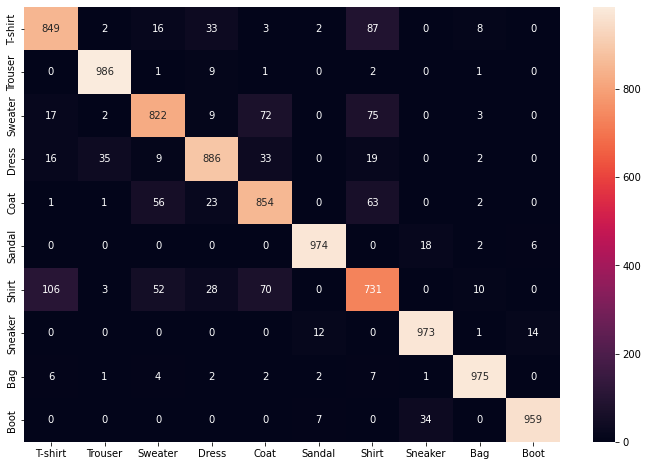

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_eval,y_pred),index = class_names,columns = class_names),annot = True,fmt="d")

In [16]:
image_generator = (range(j-10,j) for j in range(10,len(test_loader.dataset),10))

Pred:['Boot', 'Sweater', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']
Real:['Boot', 'Sweater', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


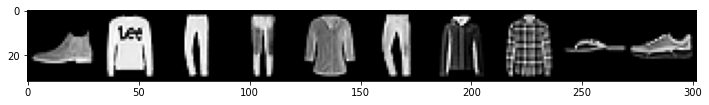

In [17]:
select_index = next(image_generator)

labels = y_eval[select_index]
predictions = y_pred[select_index]
images = X_eval[select_index]

print(f"Pred:{[class_names[i] for i in predictions]}" )
print(f"Real:{[class_names[i] for i in labels]}" )
im = make_grid(images,nrow = 10)
plt.figure(figsize=(12,6))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [18]:
torch.save(model.state_dict(), 'Exercise_00001_20epochs.pt')

## Great job!